# Using Populations


In [1]:
import mlsim
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple

Create an all default population

In [2]:
pop = mlsim.Population()

In [3]:
print(pop.get_parameter_description())

Demographic Parameters
DemParams(Pa=[0.5, 0.5], Pz_a=[[0.5, 0.5], [0.5, 0.5]])
Target Parameters 
TargetParams(Py_az=[[[0.95, 0.05], [0.95, 0.05]], [[0.95, 0.05], [0.95, 0.05]]])
Feature Parameters 
FeatureParams(distfunc=<function <lambda> at 0x7f3150ff4158>, theta=[[[[5, 2], [2, 5]], [[5, 2], [2, 5]]], [[[5, 2], [2, 5]], [[5, 2], [2, 5]]]])
Feature Noise Parameters 
NoiseParams(noisefunc=<function <lambda> at 0x7f315100d510>, theta=[[[1.0, 1.0], [1.0, 1.0]], [[1.0, 1.0], [1.0, 1.0]]])


In [4]:
pop_df1 = pop.sample(100)
pop_df1.head()

,a,z,y,x0,x1
0,1.0,0.0,0.0,4.813543,3.064467
1,0.0,1.0,1.0,1.797772,4.948939
2,0.0,0.0,1.0,5.619944,0.278485
3,0.0,1.0,1.0,0.791915,6.645071
4,0.0,0.0,0.0,3.602050,0.978499


Now demo some with various biases to create examples

In [5]:
label_bias_dem = mlsim.DemographicCorrelated(rho_a=.2,rho_z=[.25,.15])
pop_label_bias = mlsim.PopulationInstantiated(demographic_sampler=label_bias_dem)

In [6]:
pop_label_bias_df1 = pop_label_bias.sample(100)
pop_label_bias_df1.head()

,a,z,y,x0,x1
0,0.0,0.0,0.0,5.887505,3.273117
1,0.0,1.0,1.0,1.655189,5.650545
2,0.0,1.0,1.0,2.426282,5.546850
3,0.0,0.0,0.0,6.823134,3.098874
4,0.0,0.0,0.0,4.224966,0.578165


In [10]:
feature_sample_dist = lambda mu,cov :np.random.multivariate_normal(mu,cov)
per_group_means = [[[1,2,3,4,3,3],[4,6,8,8,10,6]],[[3,2,3,4,4,3],[1,3,4,4,5,3]]]
D =6
shared_cov = [np.eye(D)*.75,.95*np.eye(D)]
feature_bias = mlsim.FeaturePerGroupSharedParamWithinGroup(feature_sample_dist,per_group_means,shared_cov)
pop_feature_bias = mlsim.PopulationInstantiated(feature_sampler=feature_bias)

In [11]:
pop_feature_bias_df1 = pop_feature_bias.sample(100)
pop_feature_bias_df1.head()

,a,z,y,x0,x1,x2,x3,x4,x5
0,0.0,0.0,0.0,-0.090885,1.200672,2.188398,1.427567,2.710181,4.767387
1,0.0,1.0,0.0,2.272545,1.499508,1.421106,3.829367,4.106613,1.174519
2,1.0,1.0,1.0,0.943354,2.247792,5.432730,4.924562,4.388703,3.159802
3,1.0,0.0,0.0,-0.057968,3.161060,3.991609,4.260089,5.854696,3.139308
4,0.0,0.0,0.0,-0.691649,1.413936,3.103525,4.597716,3.447514,3.235966


/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


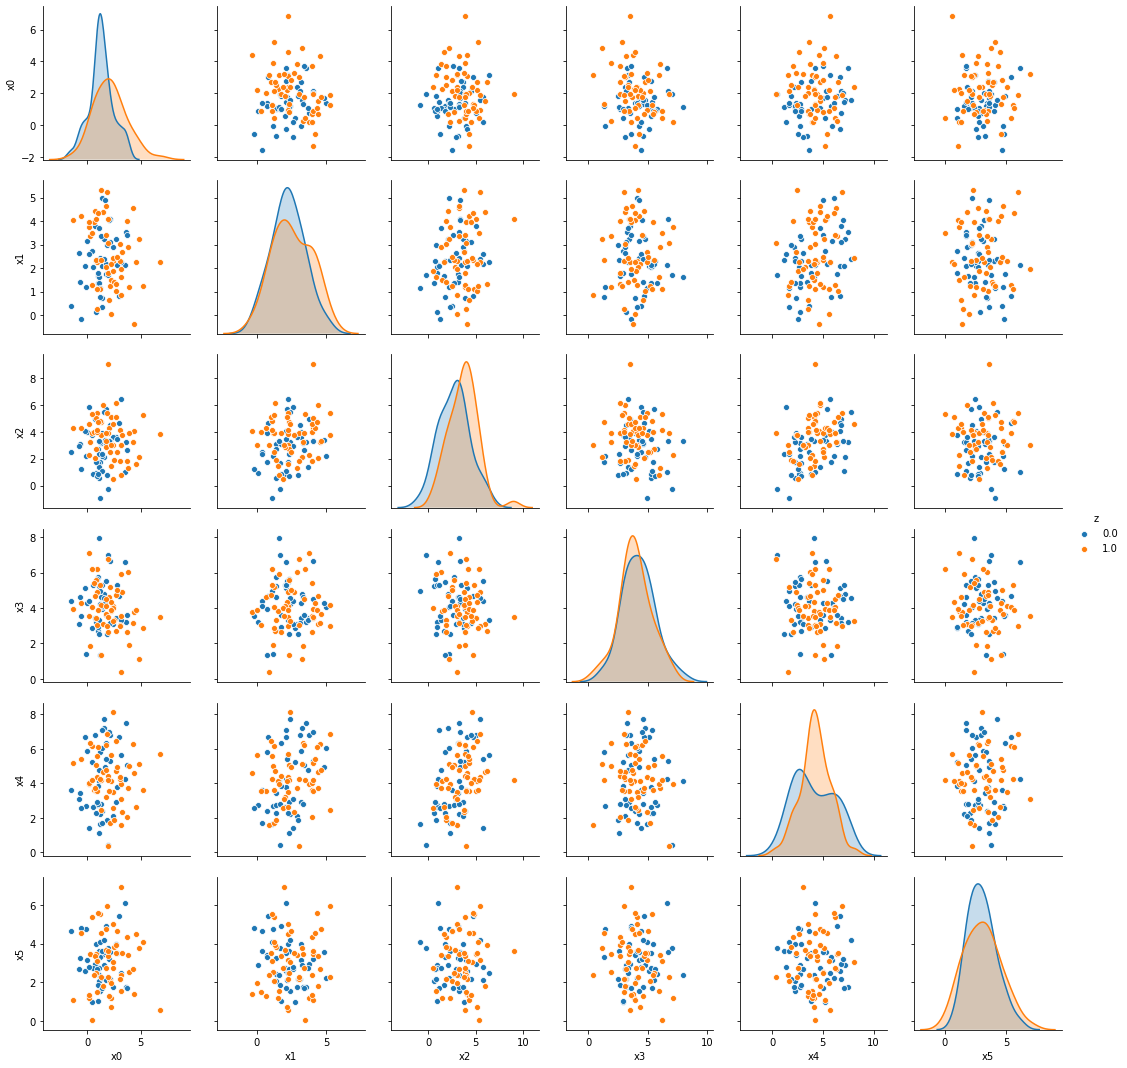

In [12]:
var_list = ['x'+ str(i) for i in range(D)]
g = sns.pairplot(pop_feature_bias_df1, vars= var_list, hue = 'z')

/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


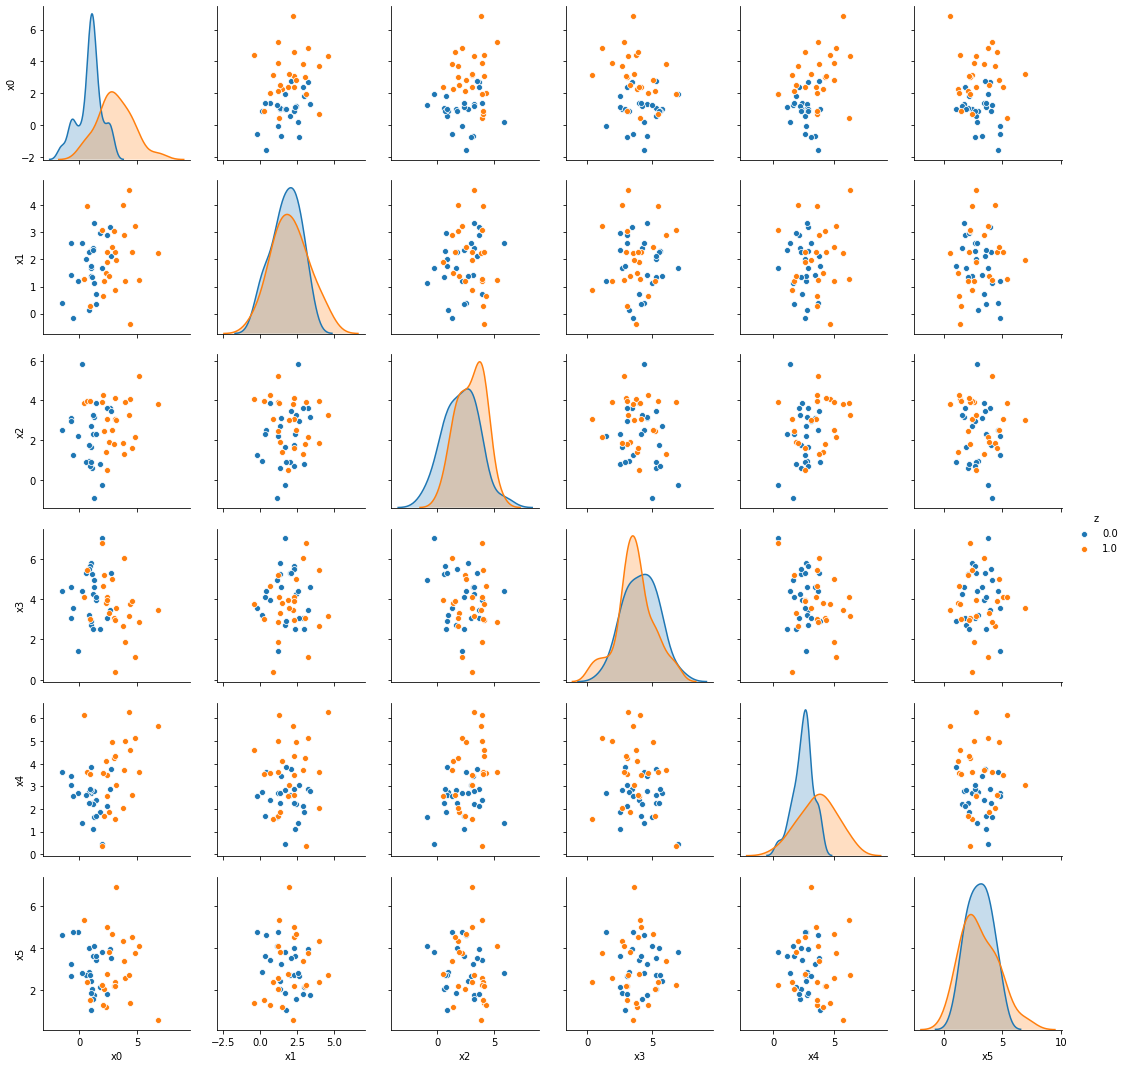

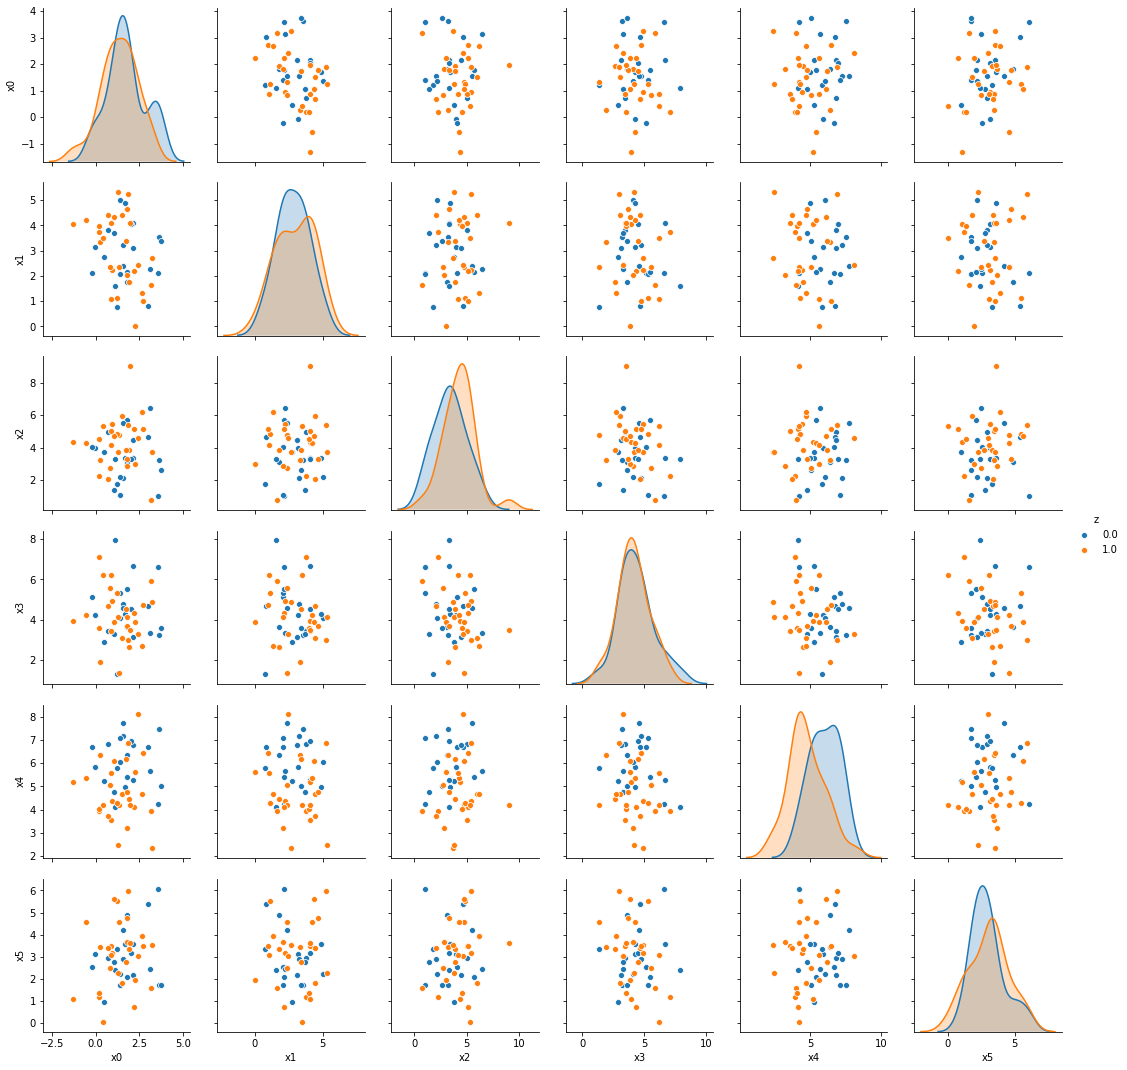

In [14]:
[sns.pairplot(dffbai, vars= var_list, hue = 'z') for ai,dffbai in pop_feature_bias_df1.groupby('a')]